### Import libraries

In [1]:
import json
from collections import defaultdict

import matplotlib
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
import sys
sys.path.insert(1, '../src')
from src import PROJECT_PATHS

In [3]:
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()

cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [5]:
pd.options.display.max_columns = None

 ### Before feature generation

In [6]:
df = pd.read_csv(f"{PROJECT_PATHS.data}\\processed\\preprocessed.csv", index_col=0)

#### Additional processing

In [7]:
df.drop(columns=['CURRENT_TIMESTAMP'], inplace=True)
df.TITLE = df.TITLE.str.lower()
df["TIMESTAMP"] = pd.to_datetime(df['TIMESTAMP'])
print(df.shape)
df.drop(df[df['TITLE'] == 'удалено'].index, inplace=True)
df["TITLE"][df['TITLE'].isnull()] = ''
print(df.shape)

(95580, 11)
(95580, 11)


In [8]:
df.head(2)

TITLE  LIKES  \
0  мвд разработало правила отправки пьяных россия...    NaN   
1  ответ на пост « геноцид 1933 года  на страница...  -39.0   

                                                TEXT  \
0  мвд россии разработало порядок доставления нет...   
1  а что вы хотите  национализм и шовинизм  в том...   

                                                TAGS  COMMENTS     NICKNAME  \
0  ['Полиция', 'Вытрезвитель', 'Опьянение', 'Прое...        50     Kanedias   
1  ['[моё]', 'Политика', 'Голод', 'Голодомор', 'У...       152  CultDeadCow   

         TIME_GAP                 TIMESTAMP  \
0  2 месяца назад 2021-02-20 22:55:57+03:00   
1  2 месяца назад 2021-02-20 18:44:21+03:00   

                                          TEXT_PUNCT  \
0  мвд россии разработало порядок доставления нет...   
1  а что вы хотите? национализм и шовинизм, в том...   

                                         TITLE_PUNCT  target  
0  МВД разработало правила отправки пьяных россия...       7  
1  Ответ на пост «"Геноцид 1933 года" на страница...       7

In [9]:
df["HOUR"] = df["TIMESTAMP"].map(lambda x: x.hour)
df["YEAR"] = df["TIMESTAMP"].map(lambda x: x.year)
df["MONTH"] = df["TIMESTAMP"].map(lambda x: x.month)
df["WEEKDAY"] = df["TIMESTAMP"].map(lambda x: x.weekday())
df["WEEK"] = df["TIMESTAMP"].map(lambda x: x.week)

<ipython-input-9-9e8a95b6654e>:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



#### EDA

In [10]:
df.head(2)

TITLE  LIKES  \
0  мвд разработало правила отправки пьяных россия...    NaN   
1  ответ на пост « геноцид 1933 года  на страница...  -39.0   

                                                TEXT  \
0  мвд россии разработало порядок доставления нет...   
1  а что вы хотите  национализм и шовинизм  в том...   

                                                TAGS  COMMENTS     NICKNAME  \
0  ['Полиция', 'Вытрезвитель', 'Опьянение', 'Прое...        50     Kanedias   
1  ['[моё]', 'Политика', 'Голод', 'Голодомор', 'У...       152  CultDeadCow   

         TIME_GAP                 TIMESTAMP  \
0  2 месяца назад 2021-02-20 22:55:57+03:00   
1  2 месяца назад 2021-02-20 18:44:21+03:00   

                                          TEXT_PUNCT  \
0  мвд россии разработало порядок доставления нет...   
1  а что вы хотите? национализм и шовинизм, в том...   

                                         TITLE_PUNCT  target  HOUR  YEAR  \
0  МВД разработало правила отправки пьяных россия...       7    22  2021   
1  Ответ на пост «"Геноцид 1933 года" на страница...       7    18  2021   

   MONTH  WEEKDAY  WEEK  
0      2        5     7  
1      2        5     7

##### Frequency Analysis

In [20]:
def char_len(df, cols):
    statistics_df = pd.DataFrame()
    for col in cols:
        statistics_df[f'len_{col}'] = df[col].str.len()
    return statistics_df

def word_len(df, cols, tokenizer=None):
    statistics_df = pd.DataFrame()
    for col in cols:
        statistics_df[f'len_words_{col}'] = df[col].map(lambda x: len(str(x).split()))
    return statistics_df

In [21]:
char_len_df = char_len(df, ['TEXT', 'TITLE'])
char_len_df['target'] = df['target']

In [22]:
char_len_plot= char_len_df[['target', 'len_TEXT', 'len_TITLE',
                         ]].groupby('target').agg(['mean', 'median'
                                                   ]).iplot(kind='bar',
                                                            barmode='overlay',
                                                            asFigure=True)
char_len_plot

In [23]:
word_len_df = word_len(df, ['TEXT', 'TITLE'])
word_len_df['target'] = df['target']

In [24]:
word_len_plot = word_len_df[['target', 'len_words_TEXT', 'len_words_TITLE',
                         ]].groupby('target').agg(['mean', 'median'
                                                   ]).iplot(kind='bar',
                                                            barmode='overlay',
                                                            asFigure=True)
word_len_plot

In [25]:
word_len_plot = word_len_df[['len_words_TEXT',
                            'len_words_TITLE']].iplot(kind='hist',
                                                       #barmode='group',
                                                       asFigure=True)
word_len_plot

In [26]:
likes_plot = df[['target', 'LIKES'
                         ]].groupby('target').agg(['mean', 'median'
                                                   ]).iplot(kind='bar',
                                                            barmode='overlay',
                                                            asFigure=True)
likes_plot

In [27]:
comments_plot = df[['target', "COMMENTS"
                         ]].groupby('target').agg(['mean', 'median'
                                                   ]).iplot(kind='bar',
                                                            barmode='overlay',
                                                            asFigure=True)
comments_plot

In [28]:
likes_comments_plot = df[["LIKES", "COMMENTS"]].iplot(kind='hist',
                                                barmode='overlay',
                                                asFigure=True)
likes_comments_plot

##### Statistics

In [29]:
statistics_df = word_len_df.copy()
statistics_df['target'] = df['target']
statistics_df['LIKES'] = df['LIKES']
statistics_df['COMMENTS'] = df['COMMENTS']

In [30]:
statistics_df.groupby('target').agg(['mean', 'median', 'min', 'max', 'std'])

len_words_TEXT                              len_words_TITLE             \
                 mean median min   max         std            mean median min   
target                                                                          
0          366.638172    239  60  5086  413.890985        4.508098      4   1   
1          319.753769    201  53  4181  371.723584        5.826813      5   1   
2          230.956409    158   1  4693  237.505795        4.715757      4   1   
3          662.087647    408  68  5035  724.262281        4.488307      4   1   
4          472.770154    251  20  5322  629.895356        4.097319      3   1   
5          391.398580    275  63  4668  374.310344        4.743449      4   1   
6          186.683968    133  55  4709  209.395538        3.452745      3   0   
7          401.373613    234  51  4657  482.736555        6.909345      6   1   
8          490.547000    330  70  5007  500.077330        4.568900      4   1   
9          340.373575    209  49  4296  362.934792        7.714743      7   1   

                            LIKES                                       \
       max       std         mean median     min      max          std   
target                                                                   
0       23  3.099036  1115.814234   95.0 -1994.0  34000.0  2388.184442   
1       25  3.601439   495.484331   23.0 -1999.0  17075.0  1589.064655   
2       27  2.822569   389.011505   20.0  -549.0  18356.0  1183.658576   
3       22  3.088858   638.964130   81.0 -1056.0  17173.0  1458.910933   
4       22  2.682571   788.618092   47.0 -2410.0  20373.0  2029.066120   
5       25  2.936338  1084.441370   99.0 -1410.0  22863.0  2365.944845   
6       26  2.839288    70.455988    9.0  -757.0  11768.0   453.777723   
7       25  4.090157   133.807271   13.0 -2331.0  20385.0   767.868585   
8       25  3.013596   572.313326   34.0 -1171.0  27555.0  1691.216486   
9       28  4.688885    89.139086   50.0 -1484.0  13213.0   258.139468   

         COMMENTS                               
             mean median min   max         std  
target                                          
0       96.396121     29   0  4505  194.823872  
1       59.136037     22   0  1964  137.819883  
2       44.777544     24   0  1549   78.522622  
3       50.281331     16   0  1912  109.015828  
4       46.449990     13   0  2330  115.868743  
5       82.978496     28   0  2486  162.431588  
6        7.346535      4   0   900   17.158616  
7       67.686357     35   0  3025  122.403362  
8       80.394700     30   0  3759  183.407560  
9       38.064013     23   0  1322   51.585213

In [31]:
target_labels= PROJECT_PATHS.ENG_TAGS

##### Correlation Analysis

In [32]:
scatter = word_len_df.copy()
scatter['LIKES'] = df['LIKES']
scatter['COMMENTS'] = df['COMMENTS']

In [33]:
scatter.columns

Index(['len_words_TEXT', 'len_words_TITLE', 'target', 'LIKES', 'COMMENTS'], dtype='object')

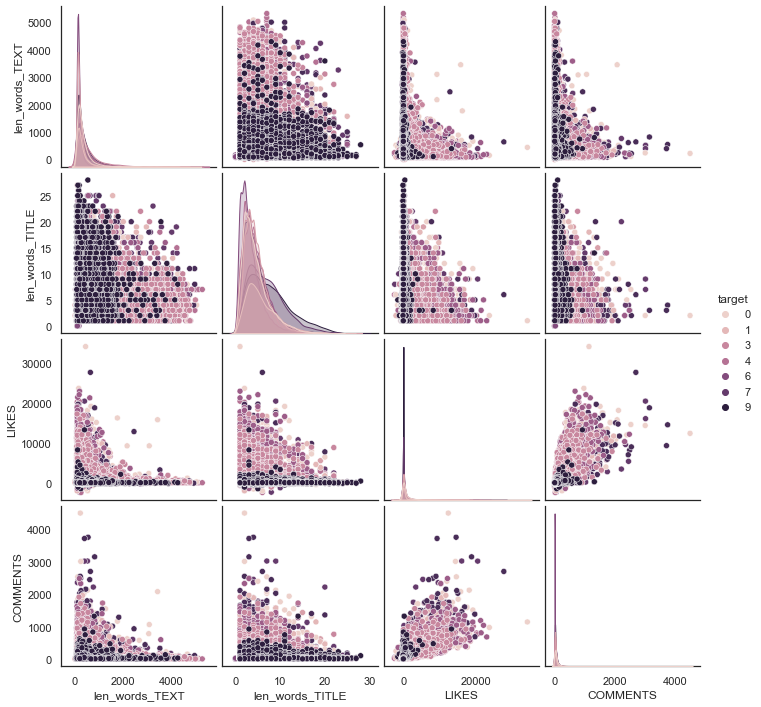

In [24]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(scatter, 
    hue='target'
)

In [34]:
corrs = scatter.drop(columns=['target']).corr()

In [26]:
import plotly.figure_factory as ff

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure

### Anomaly detection

Можно было использовать различные методы для выявления аномалий, но не все подойдут в нашем случае. Например, в случае кластеризации DBScan, недостатком этого метода является то, что чем выше размер, тем менее точным он становится. А вот Isolation Forest явно выделяет аномалии вместо того, чтобы профилировать и строить нормальные точки и области, назначая оценку каждой точке данных. Он использует тот факт, что аномалии являются точками данных меньшинства и что они имеют значения атрибутов, которые сильно отличаются от значений в обычных случаях. Этот алгоритм отлично работает с наборами данных очень большого размера, и он оказался очень эффективным способом обнаружения аномалий.

In [56]:
from sklearn.ensemble import IsolationForest

scatter['LIKES'] = scatter['LIKES'].fillna(0)
clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(scatter.drop(columns=['target']))

In [57]:
import numpy as np

unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{-1: 16123, 1: 79457}

In [58]:
counts[0]/counts[-1]*1.0

0.2029147840970588

Получается, что алгоритм примерно пятую часть постов отметил как аномальные, давайте попробуем проанализировать, что это за посты

In [59]:
scatter[preds == 1].head()

len_words_TEXT  len_words_TITLE  target  LIKES  COMMENTS
0             408                8       7    0.0        50
2             109                9       7  186.0        30
3             351                6       7   48.0        33
4             138               12       7   27.0        57
5             207                8       7    0.0         8

In [60]:
df[preds == 1].head()

TITLE  LIKES  \
0  мвд разработало правила отправки пьяных россия...    NaN   
2  сахалинский депутат лишился мандата из за виде...  186.0   
3   рогозин отчитался путину об успехах «роскосмоса»   48.0   
4  москва ждет реакцию лондона на утечку данных о...   27.0   
5        если уж митинговать   то  за  а не  против     NaN   

                                                TEXT  \
0  мвд россии разработало порядок доставления нет...   
2  депутаты томаринского городского округа  юг са...   
3  глава «роскосмоса» дмитрий рогозин на встрече ...   
4  москва  20 февраля   тасс  рф ждет реакцию вел...   
5  https journal tinkoff ru moskva vs oblast mind...   

                                                TAGS  COMMENTS  \
0  ['Полиция', 'Вытрезвитель', 'Опьянение', 'Прое...        50   
2  ['[моё]', 'Новости', 'Политика', 'Скандал', 'С...        30   
3  ['Дмитрий Рогозин', 'Новости', 'Политика', 'Ко...        33   
4  ['Мария Захарова', 'Политика', 'Великобритания...        57   
5   ['[моё]', 'Политика', 'Дело', 'Текст', 'Митинг']         8   

         NICKNAME        TIME_GAP                 TIMESTAMP  \
0        Kanedias  2 месяца назад 2021-02-20 22:55:57+03:00   
2      TASSagency  2 месяца назад 2021-02-20 12:57:10+03:00   
3  ElonMuskSpaceX  2 месяца назад 2021-02-20 12:34:19+03:00   
4          rug178  2 месяца назад 2021-02-20 12:07:30+03:00   
5            rav1  2 месяца назад 2021-02-20 11:48:18+03:00   

                                          TEXT_PUNCT  \
0  мвд россии разработало порядок доставления нет...   
2  депутаты томаринского городского округа (юг са...   
3  глава «роскосмоса» дмитрий рогозин на встрече ...   
4  москва, 20 февраля. /тасс/. рф ждет реакцию ве...   
5  https://journal.tinkoff.ru/moskva-vs-oblast/?m...   

                                         TITLE_PUNCT  target  HOUR  YEAR  \
0  МВД разработало правила отправки пьяных россия...       7    22  2021   
2  Сахалинский депутат лишился мандата из-за виде...       7    12  2021   
3   Рогозин отчитался Путину об успехах «Роскосмоса»       7    12  2021   
4  Москва ждет реакцию Лондона на утечку данных о...       7    12  2021   
5        Если уж митинговать , то "за" а не "против"       7    11  2021   

   MONTH  WEEKDAY  WEEK  ANOMALY_CLASS  
0      2        5     7              0  
2      2        5     7              0  
3      2        5     7              0  
4      2        5     7              0  
5      2        5     7              0

In [61]:
scatter[preds == -1].head()

len_words_TEXT  len_words_TITLE  target  LIKES  COMMENTS
1              133               11       7  -39.0       152
10            3146                2       7    0.0        11
12            2221                8       7    0.0         9
14            1444               13       7  191.0        44
26            1448                9       7    0.0         7

In [62]:
df[preds == -1].head()

TITLE  LIKES  \
1   ответ на пост « геноцид 1933 года  на страница...  -39.0   
10                                   эскадроны смерти    NaN   
12  армия была и остаётся становым хребтом российс...    NaN   
14  ученый михаил гельфанд — о том  почему нельзя ...  191.0   
26   мы  клиенты россии  торжественно клянемся  ст...    NaN   

                                                 TEXT  \
1   а что вы хотите  национализм и шовинизм  в том...   
10  кто руководит  эскадронами смерти  на украинен...   
12   но противостоять нападкам на нашу страну можн...   
14  в госдуме готовятся во втором чтении принять з...   
26  об интеллектуальном уровне команды по разработ...   

                                                 TAGS  COMMENTS      NICKNAME  \
1   ['[моё]', 'Политика', 'Голод', 'Голодомор', 'У...       152   CultDeadCow   
10  ['[моё]', 'Украина', 'Европа', 'Политика', 'Дл...        11    Diego12345   
12  ['Интервью', 'Политика', 'Армия', 'Длиннопост'...         9      vedmedrf   
14  ['Законопроект', 'Просвещение', 'Научпоп', 'По...        44     VitaliySh   
26  ['Политика', 'Россия', 'Стратегия', 'Статья', ...         7  tripledouble   

          TIME_GAP                 TIMESTAMP  \
1   2 месяца назад 2021-02-20 18:44:21+03:00   
10  2 месяца назад 2021-02-19 16:04:21+03:00   
12  2 месяца назад 2021-02-19 14:24:08+03:00   
14  2 месяца назад 2021-02-19 14:02:42+03:00   
26  2 месяца назад 2021-02-18 18:55:16+03:00   

                                           TEXT_PUNCT  \
1   а что вы хотите? национализм и шовинизм, в том...   
10  кто руководит "эскадронами смерти" на украинен...   
12  ...но противостоять нападкам на нашу страну мо...   
14  в госдуме готовятся во втором чтении принять з...   
26  об интеллектуальном уровне команды по разработ...   

                                          TITLE_PUNCT  target  HOUR  YEAR  \
1   Ответ на пост «"Геноцид 1933 года" на страница...       7    18  2021   
10                                   Эскадроны смерти       7    16  2021   
12  Армия была и остаётся становым хребтом российс...       7    14  2021   
14  Ученый Михаил Гельфанд — о том, почему нельзя ...       7    14  2021   
26  "Мы, клиенты России, торжественно клянемся" Ст...       7    18  2021   

    MONTH  WEEKDAY  WEEK  ANOMALY_CLASS  
1       2        5     7              0  
10      2        4     7              0  
12      2        4     7              0  
14      2        4     7              0  
26      2        3     7              0

Сразу на глаз не получается выделить ярко выраженные особенности аномальных постов. Посмотрим на значения различных статистик у аномальных и обычных постов

In [63]:
df_anomalies = scatter.drop(columns=['target'])
df_anomalies['anomaly'] = preds
df_anomalies.groupby('anomaly').agg(['mean', 'median', 'min', 'max', 'std'])

len_words_TEXT                              len_words_TITLE         \
                  mean median min   max         std            mean median   
anomaly                                                                      
-1          830.642250    450  58  5322  899.148874        6.559449      5   
 1          299.811131    208   1  1774  252.706549        4.766591      4   

                                 LIKES                                       \
        min max       std         mean median     min      max          std   
anomaly                                                                       
-1        1  28  5.169067  1967.883769  807.0 -1994.0  34000.0  2932.769959   
 1        0  18  3.052285    68.099362    7.0 -2410.0   2240.0   202.565369   

           COMMENTS                               
               mean median min   max         std  
anomaly                                           
-1       206.071141    125   0  4505  265.650813  
 1        27.075676     17   0   257   30.264707

Видно, что различные статистики для всех параметров имеют гораздо большие значения в случае аномалий. Возможно такие данные зашумляют выборку и будут мешать процессу обучения.